# Quick intro to Sympy

Sympy is the symbolic python library. Basically, it provides all the functionality of Maple in a python environment. Its compatibility with Numpy makes it very attractive for simplifying some calculations.

In [1]:
import sympy as sp
sp.init_printing()  # generates nice formulas as output

The key to working with Sympy is defining symbols as an object. These can be used to construct mathematical expressions. For example, to define a symbol $x$:

In [2]:
x = sp.Symbol("x")
x**2

Or multiple symbols at once:

In [3]:
a,b,n = sp.symbols("a,b,n")
f = (a + x)**2 + b*x + 5
f

The function solve can be used to find the solution of (nonlinear) equations.

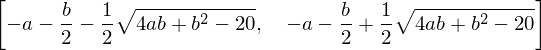

In [4]:
sp.solve(sp.Eq(f,0), x)  # solve for f = 0 

Another useful function is simplify.

In [5]:
g = sp.sin(x)**2 + sp.cos(x)**2 
g

In [6]:
g.simplify()

Taking derivatives and integration is quite simple as well.

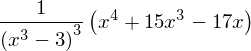

In [7]:
h = (x**4 + 15*x**3 - 17*x)/(x**3-3)**3
h

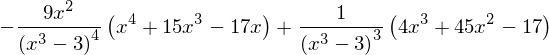

In [8]:
h.diff(x)

Note that you can turn sympy expression in python functions:

In [9]:
dh_dx = sp.lambdify(x, h.diff(x))
dh_dx(2.2)

In [10]:
(sp.log(x)).integrate(x)

or

In [11]:
(1/x).integrate((x, 1, 2))  # integrate from 1 to 2

In [12]:
from IPython.html.widgets import interact
from IPython.display import display

@interact
def factorize(n=(1, 20, 1)):
    expr = x**n - 1
    display(sp.Eq(expr, sp.factor(expr)))

We can also symbolically solve certain differntial equations

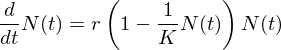

In [13]:
N, t, r, K, N0 = sp.symbols("N, t, r, K, N_0")

Ndot = r * N(t) * (1 - N(t)/K)
logistic = sp.Eq(N(t).diff(t), Ndot)
logistic

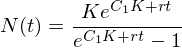

In [14]:
exact_solution = sp.dsolve(sp.powsimp(logistic), N(t))
exact_solution

For numerical methods, Sympy can be of use for calculating the Hessian, for example

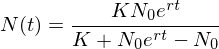

In [15]:
C_1 = exact_solution.atoms(sp.Symbol).difference(logistic.atoms(sp.Symbol)).pop()  # getting symbol for C1
exact_solution_sv = exact_solution.subs(C_1, sp.solve(exact_solution.subs(N(t), N0), C_1).pop().subs(t,0)).simplify()
exact_solution_sv

Let's plot the exact solution versus a numerical approximation in scipy.

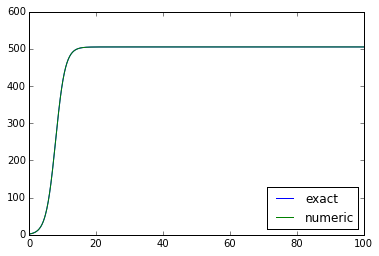

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

def plot_exact(initial_pop, capacity, growth_rate):
    exact = sp.lambdify(t, sp.solve(exact_solution_sv,N(t)).pop().subs(N0, initial_pop).subs(r, growth_rate).subs(K, capacity))
    times = np.linspace(0, 100, 1000)
    plt.plot(times, map(exact, times), label='exact')
    numeric_values = odeint(sp.lambdify((N(t), t), Ndot.subs(N0, initial_pop).subs(r, growth_rate).subs(K, capacity)), initial_pop, times)
    plt.plot(times, numeric_values, label='numeric')
    plt.legend(loc=0)


interact(plot_exact, initial_pop=(1, 100, 1), capacity=(10, 1000, 1), growth_rate=(-1, 2, 0.1))

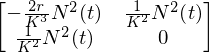

In [17]:
hessian = sp.Matrix(2, 2, [Ndot.diff(var1).diff(var2) for var1 in [K, r] for var2 in [K, r]])
hessian

Luckily, we can convert this into LaTeX code to imbed in our thesis, papers or course notes ;-)

In [18]:
sp.latex(hessian)

'\\left[\\begin{matrix}- \\frac{2 r}{K^{3}} N^{2}{\\left (t \\right )} & \\frac{1}{K^{2}} N^{2}{\\left (t \\right )}\\\\\\frac{1}{K^{2}} N^{2}{\\left (t \\right )} & 0\\end{matrix}\\right]'